In [0]:
#! wget --header="Host: datahack-prod.s3.amazonaws.com" --header="User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.100 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://datahack.analyticsvidhya.com/contest/wns-analytics-wizard-2019/" "https://datahack-prod.s3.amazonaws.com/train_file/train_NA17Sgz.zip" -O "train_NA17Sgz.zip" -c

In [0]:
#! wget --header="Host: datahack-prod.s3.amazonaws.com" --header="User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.100 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://datahack.analyticsvidhya.com/contest/wns-analytics-wizard-2019/" "https://datahack-prod.s3.amazonaws.com/test_file/test_aq1FGdB.zip" -O "test_aq1FGdB.zip" -c

In [0]:
import pandas as pd
import numpy as np

In [0]:
import zipfile
#with zipfile.ZipFile("/content/train_NA17Sgz.zip", 'r') as zip_ref:
 #   zip_ref.extractall("train")

In [0]:
import zipfile
#with zipfile.ZipFile("/content/test_aq1FGdB.zip", 'r') as zip_ref:
 #   zip_ref.extractall("test")

In [0]:
item = pd.read_csv("train/item_data.csv")

In [7]:
item.head(5)

,item_id,item_price,category_1,category_2,category_3,product_type
0,26880,4602,11,35,20,3040
1,54939,3513,12,57,85,6822
2,40383,825,17,8,279,1619
3,8777,2355,13,58,189,5264
4,113705,1267,17,39,151,10239


In [8]:
train = pd.read_csv("train/train.csv")
train.head(5)


,impression_id,impression_time,user_id,app_code,os_version,is_4G,is_click
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,0
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,1
2,70efdf2ec9b086079795c442636b55fb,2018-11-15 00:02:00,71748,259,intermediate,1,0
3,8e296a067a37563370ded05f5a3bf3ec,2018-11-15 00:02:00,69209,244,latest,1,0
4,182be0c5cdcd5072bb1864cdee4d3d6e,2018-11-15 00:02:00,62873,473,latest,0,0


In [9]:
train.describe()

,user_id,app_code,is_4G,is_click
count,237609.000000,237609.000000,237609.000000,237609.000000
mean,46454.526828,249.099971,0.361312,0.045714
std,26802.726666,135.213609,0.480382,0.208864
min,0.000000,0.000000,0.000000,0.000000
25%,23197.000000,163.000000,0.000000,0.000000
50%,46597.000000,213.000000,0.000000,0.000000
75%,69684.000000,385.000000,1.000000,0.000000
max,92586.000000,522.000000,1.000000,1.000000


0    0.954286
1    0.045714
Name: is_click, dtype: float64

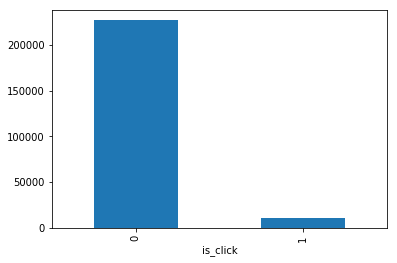

In [10]:
%matplotlib inline

train.groupby('is_click').size().plot(kind = 'bar')
rows = train.shape[0]

click_through_rate = train['is_click'].value_counts()/rows 

click_through_rate


In [11]:
view_log = pd.read_csv("train/view_log.csv")
view_log.head(5)

,server_time,device_type,session_id,user_id,item_id
0,2018-10-15 08:58:00,android,112333,4557,32970
1,2018-10-15 08:58:00,android,503590,74788,7640
2,2018-10-15 08:58:00,android,573960,23628,128855
3,2018-10-15 08:58:00,android,121691,2430,12774
4,2018-10-15 08:58:00,android,218564,19227,28296


In [12]:
test = pd.read_csv("test/test.csv")
test.head(5)

,impression_id,impression_time,user_id,app_code,os_version,is_4G
0,a9e7126a585a69a32bc7414e9d0c0ada,2018-12-13 07:44:00,44754,127,latest,1
1,caac14a5bf2ba283db7708bb34855760,2018-12-13 07:45:00,29656,44,latest,0
2,13f10ba306a19ce7bec2f3cae507b698,2018-12-13 07:46:00,25234,296,latest,1
3,39c4b4dc0e9701b55a0a4f072008fb3f,2018-12-13 07:47:00,22988,207,latest,1
4,bf5a572cca75f5fc67f4b14e58b11d70,2018-12-13 07:48:00,35431,242,latest,1


In [13]:
train.shape, item.shape, view_log.shape, test.shape

((237609, 7), (132761, 6), (3118622, 5), (90675, 6))

In [0]:
target = train["is_click"] 
train.drop(['is_click'], axis=1, inplace=True)
test_1 = test.copy()

In [0]:
train_data = pd.merge(train, view_log,  on='user_id', how="left")

In [16]:
train_data = pd.merge(train_data, item, on="item_id", how="left")
train_data.shape

(11052882, 15)

In [0]:
def noon_or(c):
  noon_or_not = []
  for i in c:
    if i>=6 and i<10:
      noon_or_not.append("morning")
    elif i>=10 and i<14:
      noon_or_not.append("noon")
    elif i>=14 and i<18:
      noon_or_not.append("evening")
    elif i>=18 and i<24:
      noon_or_not.append("evening")  
    else:
      noon_or_not.append("midnignt")
  return noon_or_not    

In [18]:
train_1= train_data.groupby(train_data.impression_id).agg({"impression_id":["count"]})["impression_id"].reset_index()
train_data = pd.merge(train_data, train_1, on="impression_id", how="left")
print(train_data.shape)




(11052882, 16)


In [0]:
#import datetime
#train_data["impression_time"] = pd.to_datetime(train_data["impression_time"])
#train_data["server_time"] = pd.to_datetime(train_data["server_time"])


In [0]:
#train_data['day_imp'] = pd.DatetimeIndex(train_data['impression_time']).day
#train_data['day_ser'] = pd.DatetimeIndex(train_data['server_time']).day
#train_data['month_imp'] = pd.DatetimeIndex(train_data['impression_time']).month
#train_data['month_ser'] = pd.DatetimeIndex(train_data['server_time']).month
#train_data['minute_imp'] = pd.DatetimeIndex(train_data['impression_time']).minute
#train_data['minute_ser'] = pd.DatetimeIndex(train_data['server_time']).minute
#train_data['hour_imp'] = pd.DatetimeIndex(train_data['impression_time']).hour
#train_data['hour_ser'] = pd.DatetimeIndex(train_data['server_time']).hour


In [19]:
train_data.head(2)

,impression_id,impression_time,user_id,app_code,os_version,is_4G,server_time,device_type,session_id,item_id,item_price,category_1,category_2,category_3,product_type,count
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,2018-10-19 18:11:00,android,190710,43886,2350.0,11.0,35.0,20.0,5622.0,1
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,2018-10-21 06:13:00,android,356854,43209,3421.0,4.0,74.0,292.0,577.0,12


In [0]:
#train_data["noon_ser"] = noon_or(train_data["hour_ser"])
#train_data["noon_imp"] = noon_or(train_data["hour_imp"])

In [0]:
#train_1= train_data.groupby(train_data.noon_ser).agg({"noon_ser":["count"]})["noon_ser"].reset_index()
#train_data = pd.merge(train_data, train_1, on="noon_ser", how="left")

#train_1= train_data.groupby(train_data.noon_imp).agg({"noon_imp":["count"]})["noon_imp"].reset_index()
#train_data = pd.merge(train_data, train_1, on="noon_imp", how="left")

#train_1= train_data.groupby(train_data.day_imp).agg({"day_imp":["count"]})["day_imp"].reset_index()
#train_data = pd.merge(train_data, train_1, on="day_imp", how="left")

#train_1= train_data.groupby(train_data.day_ser).agg({"day_ser":["count"]})["day_ser"].reset_index()
#train_data = pd.merge(train_data, train_1, on="day_ser", how="left")

#print(train_data.shape)




In [0]:
#train_data.drop_duplicates(subset=["impression_id"], keep="first", inplace=True)


In [0]:
#train_data["ctr"] = train_data["item_price"]/train_data["count"]
#train_data["cat_new1"] = train_data["category_1"]/train_data["count"]
#train_data["cat_new2"] = train_data["category_2"]/train_data["count"]
#train_data["cat_new3"] = train_data["category_3"]/train_data["count"]

#train_1= train_data.groupby(train_data.app_code).agg({"app_code":["count"]})["app_code"].reset_index()
#train_data = pd.merge(train_data, train_1, on="app_code", how="left")
#print(train_data.shape)

#train_1= train_data.groupby(train_data.category_1).agg({"category_1":["count"]})["category_1"].reset_index()
#train_data = pd.merge(train_data, train_1, on="category_1", how="left")
#print(train_data.shape)

#train_1= train_data.groupby(train_data.category_2).agg({"category_2":["count"]})["category_2"].reset_index()
#train_data = pd.merge(train_data, train_1, on="category_2", how="left")
#print(train_data.shape)

#train_1= train_data.groupby(train_data.category_3).agg({"category_3":["count"]})["category_3"].reset_index()
#train_data = pd.merge(train_data, train_1, on="category_3", how="left")
#print(train_data.shape)

#train_1= train_data.groupby(train_data.product_type).agg({"product_type":["count"]})["product_type"].reset_index()
#train_data = pd.merge(train_data, train_1, on="product_type", how="left")
#print(train_data.shape)

#train_1= train_data.groupby(train_data.device_type).agg({"device_type":["count"]})["device_type"].reset_index()
#train_data = pd.merge(train_data, train_1, on="device_type", how="left")
#print(train_data.shape)

#train_1= train_data.groupby(train_data.os_version).agg({"os_version":["count"]})["os_version"].reset_index()
#train_data = pd.merge(train_data, train_1, on="os_version", how="left")
#print(train_data.shape)

#train_1= train_data.groupby(train_data.user_id).agg({"user_id":["count"]})["user_id"].reset_index()
#train_data = pd.merge(train_data, train_1, on="user_id", how="left")
#print(train_data.shape)

#train_1= train_data.groupby(train_data.item_id).agg({"item_id":["count"]})["item_id"].reset_index()
#train_data = pd.merge(train_data, train_1, on="item_id", how="left")
#print(train_data.shape)






In [21]:
train_data.shape

(11052882, 16)

In [0]:
#train_data["impression"] = train_data["impression_id"].value_counts()

In [23]:
train_data.head(5)

,impression_id,impression_time,user_id,app_code,os_version,is_4G,server_time,device_type,session_id,item_id,item_price,category_1,category_2,category_3,product_type,count
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,2018-10-19 18:11:00,android,190710,43886,2350.0,11.0,35.0,20.0,5622.0,1
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,2018-10-21 06:13:00,android,356854,43209,3421.0,4.0,74.0,292.0,577.0,12
2,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,2018-10-21 06:13:00,android,356854,66370,14166.0,4.0,74.0,292.0,3399.0,12
3,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,2018-10-21 17:01:00,android,345289,43209,3421.0,4.0,74.0,292.0,577.0,12
4,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,2018-10-22 09:54:00,android,406658,43209,3421.0,4.0,74.0,292.0,577.0,12


In [24]:
test_data = pd.merge(test, view_log,  on='user_id', how="left")
print(test_data.shape)
test_data = pd.merge(test_data, item, on="item_id", how="left")
print(test_data.shape)
#test_data = pd.merge(test_data, item, on="item_id")

(3871697, 10)
(3871697, 15)


In [25]:
test_2= test_data.groupby(test_data.impression_id).agg({"impression_id":["count"]})["impression_id"].reset_index()
test_data = pd.merge(test_data, test_2, on="impression_id", how="left")
print(test_data.shape)



(3871697, 16)


In [0]:
train_data = pd.concat([train_data,test_data])

In [0]:
#test_data["impression_time"] = pd.to_datetime(test_data["impression_time"])
#test_data["server_time"] = pd.to_datetime(test_data["server_time"])

In [0]:
#test_data['day_imp'] = pd.DatetimeIndex(test_data['impression_time']).day
#test_data['day_ser'] = pd.DatetimeIndex(test_data['server_time']).day
#test_data['month_imp'] = pd.DatetimeIndex(test_data['impression_time']).month
#test_data['month_ser'] = pd.DatetimeIndex(test_data['server_time']).month
#test_data['minute_imp'] = pd.DatetimeIndex(test_data['impression_time']).minute
#test_data['minute_ser'] = pd.DatetimeIndex(test_data['server_time']).minute
#test_data['hour_imp'] = pd.DatetimeIndex(test_data['impression_time']).hour
#test_data['hour_ser'] = pd.DatetimeIndex(test_data['server_time']).hour



In [0]:
#test_data["noon_ser"] = noon_or(test_data["hour_ser"])
#test_data["noon_imp"] = noon_or(test_data["hour_imp"])



In [0]:
#test_2= test_data.groupby(test_data.noon_ser).agg({"noon_ser":["count"]})["noon_ser"].reset_index()
#test_data = pd.merge(test_data, test_2, on="noon_ser", how="left")
#print(test_data.shape)

#test_2= test_data.groupby(test_data.noon_imp).agg({"noon_imp":["count"]})["noon_imp"].reset_index()
#test_data = pd.merge(test_data, test_2, on="noon_imp", how="left")
#print(test_data.shape)

#test_2= test_data.groupby(test_data.day_imp).agg({"day_imp":["count"]})["day_imp"].reset_index()
#test_data = pd.merge(test_data, test_2, on="day_imp", how="left")
#print(test_data.shape)

#test_2= test_data.groupby(test_data.day_ser).agg({"day_ser":["count"]})["day_ser"].reset_index()
#test_data = pd.merge(test_data, test_2, on="day_ser", how="left")
#print(test_data.shape)

In [29]:

test_data.shape

(3871697, 16)

In [30]:
test_data.tail(5)

,impression_id,impression_time,user_id,app_code,os_version,is_4G,server_time,device_type,session_id,item_id,item_price,category_1,category_2,category_3,product_type,count
3871692,539145030fb3600d26d6a64130310035,2018-12-18 23:59:00,82078,242,latest,1,2018-11-30 11:36:00,android,580845,76156,627.0,12.0,57.0,184.0,9622.0,9
3871693,539145030fb3600d26d6a64130310035,2018-12-18 23:59:00,82078,242,latest,1,2018-12-05 09:43:00,android,997191,2580,5120.0,0.0,45.0,73.0,6718.0,9
3871694,539145030fb3600d26d6a64130310035,2018-12-18 23:59:00,82078,242,latest,1,2018-12-10 09:49:00,android,266654,70965,3744.0,16.0,56.0,17.0,9227.0,9
3871695,539145030fb3600d26d6a64130310035,2018-12-18 23:59:00,82078,242,latest,1,2018-12-11 09:53:00,android,994516,70965,3744.0,16.0,56.0,17.0,9227.0,9
3871696,539145030fb3600d26d6a64130310035,2018-12-18 23:59:00,82078,242,latest,1,2018-12-11 15:47:00,android,57901,35963,22528.0,10.0,63.0,220.0,9959.0,9


In [0]:
#train_data.drop_duplicates(subset=["impression_id"], keep="first", inplace=True)

# Drop target and merge train and test

In [32]:
train_data.shape

(14924579, 16)

In [0]:
#train_data.reset_index(inplace=True)

In [34]:
train_data.tail(2)

,impression_id,impression_time,user_id,app_code,os_version,is_4G,server_time,device_type,session_id,item_id,item_price,category_1,category_2,category_3,product_type,count
3871695,539145030fb3600d26d6a64130310035,2018-12-18 23:59:00,82078,242,latest,1,2018-12-11 09:53:00,android,994516,70965,3744.0,16.0,56.0,17.0,9227.0,9
3871696,539145030fb3600d26d6a64130310035,2018-12-18 23:59:00,82078,242,latest,1,2018-12-11 15:47:00,android,57901,35963,22528.0,10.0,63.0,220.0,9959.0,9


In [35]:
train_data["ctr"] = train_data["item_price"]/train_data["count"]
train_data["cat_new1"] = train_data["category_1"]/train_data["count"]
train_data["cat_new2"] = train_data["category_2"]/train_data["count"]
train_data["cat_new3"] = train_data["category_3"]/train_data["count"]

train_1= train_data.groupby(train_data.app_code).agg({"app_code":["count"]})["app_code"].reset_index()
train_data = pd.merge(train_data, train_1, on="app_code", how="left", suffixes=("_1", '_12'))
print(train_data.shape)

train_1= train_data.groupby(train_data.category_1).agg({"category_1":["count"]})["category_1"].reset_index()
train_data = pd.merge(train_data, train_1, on="category_1", how="left", suffixes=("_3", '_13'))
print(train_data.shape)

train_1= train_data.groupby(train_data.category_2).agg({"category_2":["count"]})["category_2"].reset_index()
train_data = pd.merge(train_data, train_1, on="category_2", how="left", suffixes=("_4", '_14'))
print(train_data.shape)

train_1= train_data.groupby(train_data.category_3).agg({"category_3":["count"]})["category_3"].reset_index()
train_data = pd.merge(train_data, train_1, on="category_3", how="left", suffixes=("_5", '_15'))
print(train_data.shape)

train_1= train_data.groupby(train_data.product_type).agg({"product_type":["count"]})["product_type"].reset_index()
train_data = pd.merge(train_data, train_1, on="product_type", how="left", suffixes=("_6", '_16'))
print(train_data.shape)

#train_1= train_data.groupby(train_data.device_type).agg({"device_type":["count"]})["device_type"].reset_index()
#train_data = pd.merge(train_data, train_1, on="device_type", how="left")
#print(train_data.shape)

train_1= train_data.groupby(train_data.os_version).agg({"os_version":["count"]})["os_version"].reset_index()
train_data = pd.merge(train_data, train_1, on="os_version", how="left", suffixes=("_7", '_17'))
print(train_data.shape)

train_1= train_data.groupby(train_data.user_id).agg({"user_id":["count"]})["user_id"].reset_index()
train_data = pd.merge(train_data, train_1, on="user_id", how="left", suffixes=("_8", '_18'))
print(train_data.shape)

train_1= train_data.groupby(train_data.item_id).agg({"item_id":["count"]})["item_id"].reset_index()
train_data = pd.merge(train_data, train_1, on="item_id", how="left", suffixes=("_9", '_19'))
print(train_data.shape)

train_1= train_data.groupby(train_data.item_price).agg({"item_price":["count"]})["item_price"].reset_index()
train_data = pd.merge(train_data, train_1, on="item_price", how="left", suffixes=("_20", '_200'))
print(train_data.shape)

train_1= train_data.groupby(train_data.session_id).agg({"session_id":["count"]})["session_id"].reset_index()
train_data = pd.merge(train_data, train_1, on="session_id", how="left", suffixes=("21", '_211'))
print(train_data.shape)





(14924579, 21)
(14924579, 22)
(14924579, 23)
(14924579, 24)
(14924579, 25)
(14924579, 26)
(14924579, 27)
(14924579, 28)
(14924579, 29)
(14924579, 30)


In [36]:
train_data.tail(2)

,impression_id,impression_time,user_id,app_code,os_version,is_4G,server_time,device_type,session_id,item_id,item_price,category_1,category_2,category_3,product_type,count_1,ctr,cat_new1,cat_new2,cat_new3,count_12,count_4,count_14,count_6,count_16,count_8,count_18,count_20,count_200,count
14924577,539145030fb3600d26d6a64130310035,2018-12-18 23:59:00,82078,242,latest,1,2018-12-11 09:53:00,android,994516,70965,3744.0,16.0,56.0,17.0,9227.0,9,416.000000,1.777778,6.222222,1.888889,175445,613022.0,186073.0,43999.0,29680.0,7844613,153,19716,25016.0,17
14924578,539145030fb3600d26d6a64130310035,2018-12-18 23:59:00,82078,242,latest,1,2018-12-11 15:47:00,android,57901,35963,22528.0,10.0,63.0,220.0,9959.0,9,2503.111111,1.111111,7.000000,24.444444,175445,831106.0,350728.0,217217.0,74867.0,7844613,153,16272,16498.0,17


In [0]:
#test_data["ctr"] = test_data["item_price"]/test_data["count"]
#test_data["cat_new1"] = test_data["category_1"]/test_data["count"]
#test_data["cat_new2"] = test_data["category_2"]/test_data["count"]
#test_data["cat_new3"] = test_data["category_3"]/test_data["count"]

#test_2= test_data.groupby(test_data.app_code).agg({"app_code":["count"]})["app_code"].reset_index()
#test_data = pd.merge(test_data, test_2, on="app_code", how="left")
#print(test_data.shape)

#test_2= test_data.groupby(test_data.category_1).agg({"category_1":["count"]})["category_1"].reset_index()
#test_data = pd.merge(test_data, test_2, on="category_1", how="left")
#print(test_data.shape)

#test_2= test_data.groupby(test_data.category_2).agg({"category_2":["count"]})["category_2"].reset_index()
#test_data = pd.merge(test_data, test_2, on="category_2", how="left")
#test_2= test_data.groupby(test_data.category_3).agg({"category_3":["count"]})["category_3"].reset_index()
#test_data = pd.merge(test_data, test_2, on="category_3", how="left")
#print(test_data.shape)

#test_2= test_data.groupby(test_data.product_type).agg({"product_type":["count"]})["product_type"].reset_index()
#test_data = pd.merge(test_data, test_2, on="product_type", how="left")
#print(test_data.shape)

#test_2= test_data.groupby(test_data.device_type).agg({"device_type":["count"]})["device_type"].reset_index()
#test_data = pd.merge(test_data, test_2, on="device_type", how="left")
#print(test_data.shape)

#test_2= test_data.groupby(test_data.os_version).agg({"os_version":["count"]})["os_version"].reset_index()
#test_data = pd.merge(test_data, test_2, on="os_version", how="left")
#print(test_data.shape)

#test_2= test_data.groupby(test_data.user_id).agg({"user_id":["count"]})["user_id"].reset_index()
#test_data = pd.merge(test_data, test_2, on="user_id", how="left")
#print(test_data.shape)

#test_2= test_data.groupby(test_data.item_id).agg({"item_id":["count"]})["item_id"].reset_index()
#test_data = pd.merge(test_data, test_2, on="item_id", how="left")
#print(test_data.shape)







In [37]:
#test_data = test_data.groupby(["impression_id"])
test_data.shape

(3871697, 16)

In [38]:
test_data["os_version"].isin(train_data["os_version"]).value_counts()

True    3871697
Name: os_version, dtype: int64

In [39]:
test_data["device_type"].isin(train_data["device_type"]).value_counts()

True    3871697
Name: device_type, dtype: int64

In [40]:
test_data["app_code"].isin(train_data["app_code"]).value_counts()

True    3871697
Name: app_code, dtype: int64

In [41]:
test_data["user_id"].isin(train_data["user_id"]).value_counts()

True    3871697
Name: user_id, dtype: int64

In [42]:
test_data["session_id"].isin(train_data["session_id"]).value_counts()

True    3871697
Name: session_id, dtype: int64

In [43]:
test_data["item_id"].isin(train_data["item_id"]).value_counts()

True    3871697
Name: item_id, dtype: int64

In [44]:
test_data["product_type"].isin(train_data["product_type"]).value_counts()

True     3869280
False       2417
Name: product_type, dtype: int64

In [45]:
test_data["category_1"].isin(train_data["category_1"]).value_counts()

True     3869280
False       2417
Name: category_1, dtype: int64

In [46]:
test_data["category_2"].isin(train_data["category_2"]).value_counts()

True     3869280
False       2417
Name: category_2, dtype: int64

In [47]:
test_data["category_3"].isin(train_data["category_3"]).value_counts()

True     3869280
False       2417
Name: category_3, dtype: int64

In [48]:
test_data["item_price"].isin(train_data["item_price"]).value_counts()

True     3869280
False       2417
Name: item_price, dtype: int64

In [49]:
test_data.head(5)

,impression_id,impression_time,user_id,app_code,os_version,is_4G,server_time,device_type,session_id,item_id,item_price,category_1,category_2,category_3,product_type,count
0,a9e7126a585a69a32bc7414e9d0c0ada,2018-12-13 07:44:00,44754,127,latest,1,2018-12-11 19:01:00,android,923045,128995,23424.0,1.0,42.0,220.0,1617.0,1
1,caac14a5bf2ba283db7708bb34855760,2018-12-13 07:45:00,29656,44,latest,0,2018-10-16 10:47:00,android,368797,55912,1529.0,9.0,44.0,114.0,9857.0,72
2,caac14a5bf2ba283db7708bb34855760,2018-12-13 07:45:00,29656,44,latest,0,2018-10-16 10:48:00,android,368797,80771,11697.0,9.0,3.0,48.0,6347.0,72
3,caac14a5bf2ba283db7708bb34855760,2018-12-13 07:45:00,29656,44,latest,0,2018-10-16 10:49:00,android,368797,80771,11697.0,9.0,3.0,48.0,6347.0,72
4,caac14a5bf2ba283db7708bb34855760,2018-12-13 07:45:00,29656,44,latest,0,2018-10-16 10:54:00,android,368797,8365,18176.0,1.0,42.0,157.0,1617.0,72


In [0]:
#train_data["cat_new1"] = (train_data["category_1"]-train_data["category_2"])/train_data["category_2"]
#train_data["cat_new2"] = (train_data["category_1"]+train_data["category_2"])/train_data["category_1"]
#train_data["cat_new3"] = (train_data["category_1"]-train_data["category_3"])/train_data["category_3"]
#train_data["cat_new4"] = (train_data["category_1"]+train_data["category_3"])/train_data["category_1"]
#train_data["cat_new5"] = (train_data["category_3"]-train_data["category_2"])/train_data["category_2"]
#train_data["cat_new6"] = (train_data["category_3"]+train_data["category_2"])/train_data["category_3"]

In [0]:
#test_data["cat_new1"] = (test_data["category_1"]-test_data["category_2"])/test_data["category_2"]
#test_data["cat_new2"] = (test_data["category_1"]+test_data["category_2"])/test_data["category_1"]
#test_data["cat_new3"] = (test_data["category_1"]-test_data["category_3"])/test_data["category_3"]
#test_data["cat_new4"] = (test_data["category_1"]+test_data["category_3"])/test_data["category_1"]
#test_data["cat_new5"] = (test_data["category_3"]-test_data["category_2"])/test_data["category_2"]
#test_data["cat_new6"] = (test_data["category_3"]+test_data["category_2"])/test_data["category_3"]

In [0]:
#train_data["cat_new1"] = train_data["category_1"]/train_data["count"]
#train_data["cat_new2"] = train_data["category_2"]/train_data["count"]
#train_data["cat_new3"] = train_data["category_3"]/train_data["count"]

In [0]:
#test_data["cat_new1"] = test_data["category_1"]/test_data["count"]
#test_data["cat_new2"] = test_data["category_2"]/test_data["count"]
#test_data["cat_new3"] = test_data["category_3"]/test_data["count"]

# Price/Count

In [0]:
#train_data["ctr"] = train_data["item_price"]/train_data["count"]
#test_data["ctr"] = test_data["item_price"]/test_data["count"]

In [0]:
#sub.tail(5)

In [0]:
#sub.drop_duplicates(subset=["impression_id"], keep="first", inplace=True)
#sub.shape

# Datetime

In [57]:
train_data.head(3)

,impression_id,impression_time,user_id,app_code,os_version,is_4G,server_time,device_type,session_id,item_id,item_price,category_1,category_2,category_3,product_type,count_1,ctr,cat_new1,cat_new2,cat_new3,count_12,count_4,count_14,count_6,count_16,count_8,count_18,count_20,count_200,count
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,2018-10-19 18:11:00,android,190710,43886,2350.0,11.0,35.0,20.0,5622.0,1,2350.000000,11.000000,35.000000,20.000000,30936,1129976.0,259780.0,125694.0,143701.0,3280315,3,377,995.0,3
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,2018-10-21 06:13:00,android,356854,43209,3421.0,4.0,74.0,292.0,577.0,12,285.083333,0.333333,6.166667,24.333333,11867,1397337.0,492090.0,490837.0,1305.0,7844613,732,892,1019.0,122
2,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,2018-10-21 06:13:00,android,356854,66370,14166.0,4.0,74.0,292.0,3399.0,12,1180.500000,0.333333,6.166667,24.333333,11867,1397337.0,492090.0,490837.0,47773.0,7844613,732,350,355.0,122


In [0]:
import datetime
train_data["impression_time"] = pd.to_datetime(train_data["impression_time"])
train_data["server_time"] = pd.to_datetime(train_data["server_time"])

#test_data["impression_time"] = pd.to_datetime(test_data["impression_time"])
#test_data["server_time"] = pd.to_datetime(test_data["server_time"])

In [0]:
train_data['day_imp'] = pd.DatetimeIndex(train_data['impression_time']).day
train_data['day_ser'] = pd.DatetimeIndex(train_data['server_time']).day
train_data['week_imp'] = pd.DatetimeIndex(train_data['impression_time']).week
train_data['week_ser'] = pd.DatetimeIndex(train_data['server_time']).week
#train_data['minute_imp'] = pd.DatetimeIndex(train_data['impression_time']).minute
#train_data['minute_ser'] = pd.DatetimeIndex(train_data['server_time']).minute
train_data['hour_imp'] = pd.DatetimeIndex(train_data['impression_time']).hour
train_data['hour_ser'] = pd.DatetimeIndex(train_data['server_time']).hour
train_data['day_week_ser'] = pd.DatetimeIndex(train_data['server_time']).dayofweek
train_data['day_week_imp'] = pd.DatetimeIndex(train_data['impression_time']).dayofweek


#test_data['day_imp'] = pd.DatetimeIndex(test_data['impression_time']).day
#test_data['day_ser'] = pd.DatetimeIndex(test_data['server_time']).day
#test_data['week_imp'] = pd.DatetimeIndex(test_data['impression_time']).week
#test_data['week_ser'] = pd.DatetimeIndex(test_data['server_time']).week
#test_data['minute_imp'] = pd.DatetimeIndex(test_data['impression_time']).minute
#test_data['minute_ser'] = pd.DatetimeIndex(test_data['server_time']).minute
#test_data['hour_imp'] = pd.DatetimeIndex(test_data['impression_time']).hour
#test_data['hour_ser'] = pd.DatetimeIndex(test_data['server_time']).hour
#test_data['day_week_ser'] = pd.DatetimeIndex(test_data['server_time']).dayofweek
#test_data['day_week_imp'] = pd.DatetimeIndex(test_data['impression_time']).dayofweek







In [60]:
train_data.tail(2)

,impression_id,impression_time,user_id,app_code,os_version,is_4G,server_time,device_type,session_id,item_id,item_price,category_1,category_2,category_3,product_type,count_1,ctr,cat_new1,cat_new2,cat_new3,count_12,count_4,count_14,count_6,count_16,count_8,count_18,count_20,count_200,count,day_imp,day_ser,week_imp,week_ser,hour_imp,hour_ser,day_week_ser,day_week_imp
14924577,539145030fb3600d26d6a64130310035,2018-12-18 23:59:00,82078,242,latest,1,2018-12-11 09:53:00,android,994516,70965,3744.0,16.0,56.0,17.0,9227.0,9,416.000000,1.777778,6.222222,1.888889,175445,613022.0,186073.0,43999.0,29680.0,7844613,153,19716,25016.0,17,18,11,51,50,23,9,1,1
14924578,539145030fb3600d26d6a64130310035,2018-12-18 23:59:00,82078,242,latest,1,2018-12-11 15:47:00,android,57901,35963,22528.0,10.0,63.0,220.0,9959.0,9,2503.111111,1.111111,7.000000,24.444444,175445,831106.0,350728.0,217217.0,74867.0,7844613,153,16272,16498.0,17,18,11,51,50,23,15,1,1


In [61]:
'''
Taking into account just the CLICKS 
'''
#item_df = pd.DataFrame() 
#item_df['pos_clicks'] = train_data[['item_id','is_click']].groupby(['item_id']).count().reset_index().sort_values('is_click',ascending=False)['is_click']
            
#item_df

'\nTaking into account just the CLICKS \n'

In [62]:
'''
Taking into account just the CLICKS 
'''
#session_df = pd.DataFrame() 
#session_df['pos_clicks'] = train_data[['session_id','is_click']].groupby(['session_id']).count().reset_index().sort_values('is_click',ascending=False)['is_click']
            
#session_df

'\nTaking into account just the CLICKS \n'

In [63]:
'''
Taking into account just the CLICKS 
'''
#user_df = pd.DataFrame() 
#user_df['pos_clicks'] = train_data[['user_id','is_click']].groupby(['user_id']).count().reset_index().sort_values('is_click',ascending=False)['is_click']
            
#user_df

'\nTaking into account just the CLICKS \n'

In [64]:
'''
Taking into account just the CLICKS 
'''
#app_df = pd.DataFrame() 
#app_df['pos_clicks'] = train_data[['app_code','is_click']].groupby(['app_code']).count().reset_index().sort_values('is_click',ascending=False)['is_click']
            
#app_df

'\nTaking into account just the CLICKS \n'

In [65]:
'''
Taking into account just the CLICKS 
'''
#hour_df = pd.DataFrame() 
#hour_df['pos_clicks'] = train_data[['hour_imp','is_click']].groupby(['hour_imp']).count().reset_index().sort_values('is_click',ascending=False)['is_click']
            
#hour_df

'\nTaking into account just the CLICKS \n'

In [66]:
'''
Taking into account just the CLICKS 
'''
#hour_df = pd.DataFrame() 
#hour_df['pos_clicks'] = train_data[['hour_ser','is_click']].groupby(['hour_ser']).count().reset_index().sort_values('is_click',ascending=False)['is_click']
            
#hour_df

'\nTaking into account just the CLICKS \n'

In [67]:
'''
Taking into account just the CLICKS 
'''
#week_df = pd.DataFrame() 
#week_df['pos_clicks'] = train_data[['week_imp','is_click']].groupby(['week_imp']).count().reset_index().sort_values('is_click',ascending=False)['is_click']
            
#week_df

'\nTaking into account just the CLICKS \n'

In [68]:
'''
Taking into account just the CLICKS 
'''
#week_df = pd.DataFrame() 
#week_df['pos_clicks'] = train_data[['week_ser','is_click']].groupby(['week_ser']).count().reset_index().sort_values('is_click',ascending=False)['is_click']
            
#week_df

'\nTaking into account just the CLICKS \n'

In [69]:
'''
Taking into account just the CLICKS 
'''
#day_week_df = pd.DataFrame() 
#day_week_df['pos_clicks'] = train_data[['day_week_ser','is_click']].groupby(['day_week_ser']).count().reset_index().sort_values('is_click',ascending=False)['is_click']
            
#day_week_df

'\nTaking into account just the CLICKS \n'

In [70]:
'''
Taking into account just the CLICKS 
'''
#day_week_df = pd.DataFrame() 
#day_week_df['pos_clicks'] = train_data[['day_week_imp','is_click']].groupby(['day_week_imp']).count().reset_index().sort_values('is_click',ascending=False)['is_click']
            
#day_week_df

'\nTaking into account just the CLICKS \n'

In [0]:
#def noon_or(c):
#  noon_or_not = []
#  for i in c:
#    if i<=12:
#      noon_or_not.append("noon")
#    else:
#      noon_or_not.append("not_noon")
#  return noon_or_not    

In [0]:
train_data["noon_ser"] = noon_or(train_data["hour_ser"])
train_data["noon_imp"] = noon_or(train_data["hour_imp"])

#test_data["noon_ser"] = noon_or(test_data["hour_ser"])
#test_data["noon_imp"] = noon_or(test_data["hour_imp"])



In [0]:
train_data["diff"] = (train_data["hour_ser"]-train_data["hour_imp"])*60 
#test_data["diff"] = (test_data["hour_ser"]-test_data["hour_imp"])*60 

In [74]:
train_1= train_data.groupby(train_data.noon_ser).agg({"noon_ser":["count"]})["noon_ser"].reset_index()
train_data = pd.merge(train_data, train_1, on="noon_ser", how="left", suffixes=('_22', '_212'))
print(train_data.shape)

train_1= train_data.groupby(train_data.noon_imp).agg({"noon_imp":["count"]})["noon_imp"].reset_index()
train_data = pd.merge(train_data, train_1, on="noon_imp", how="left", suffixes=('_22', '_212'))
print(train_data.shape)

train_1= train_data.groupby(train_data.day_imp).agg({"day_imp":["count"]})["day_imp"].reset_index()
train_data = pd.merge(train_data, train_1, on="day_imp", how="left")
print(train_data.shape)

train_1= train_data.groupby(train_data.day_ser).agg({"day_ser":["count"]})["day_ser"].reset_index()
train_data = pd.merge(train_data, train_1, on="day_ser", how="left", suffixes=('_23', '_213'))

print(train_data.shape)

train_1= train_data.groupby(train_data.day_week_ser).agg({"day_week_ser":["count"]})["day_week_ser"].reset_index()
train_data = pd.merge(train_data, train_1, on="day_week_ser", how="left", suffixes=('_24', '_214'))

print(train_data.shape)

train_1= train_data.groupby(train_data.week_ser).agg({"week_ser":["count"]})["week_ser"].reset_index()
train_data = pd.merge(train_data, train_1, on="week_ser", how="left", suffixes=('_25', '_215'))

print(train_data.shape)



(14924579, 42)
(14924579, 43)
(14924579, 44)
(14924579, 45)
(14924579, 46)
(14924579, 47)


In [0]:
#test_2= test_data.groupby(test_data.noon_ser).agg({"noon_ser":["count"]})["noon_ser"].reset_index()
#test_data = pd.merge(test_data, test_2, on="noon_ser", how="left")
#print(test_data.shape)

#test_2= test_data.groupby(test_data.noon_imp).agg({"noon_imp":["count"]})["noon_imp"].reset_index()
#test_data = pd.merge(test_data, test_2, on="noon_imp", how="left")
#print(test_data.shape)

#test_2= test_data.groupby(test_data.day_imp).agg({"day_imp":["count"]})["day_imp"].reset_index()
#test_data = pd.merge(test_data, test_2, on="day_imp", how="left")
#print(test_data.shape)

#test_2= test_data.groupby(test_data.day_ser).agg({"day_ser":["count"]})["day_ser"].reset_index()
#test_data = pd.merge(test_data, test_2, on="day_ser", how="left")
#print(test_data.shape)

#test_2= test_data.groupby(test_data.day_week_ser).agg({"day_week_ser":["count"]})["day_week_ser"].reset_index()
#test_data = pd.merge(test_data, test_2, on="day_week_ser", how="left")
#print(test_data.shape)

#test_2= test_data.groupby(test_data.week_ser).agg({"week_ser":["count"]})["week_ser"].reset_index()
#test_data = pd.merge(test_data, test_2, on="week_ser", how="left")
#print(test_data.shape)

In [76]:
train_data.tail(2)

,impression_id,impression_time,user_id,app_code,os_version,is_4G,server_time,device_type,session_id,item_id,item_price,category_1,category_2,category_3,product_type,count_1,ctr,cat_new1,cat_new2,cat_new3,count_12,count_4,count_14,count_6,count_16,count_8,count_18,count_20,count_200,count_22,day_imp,day_ser,week_imp,week_ser,hour_imp,hour_ser,day_week_ser,day_week_imp,noon_ser,noon_imp,diff,count_212,count_x,count_y,count_24,count_214,count
14924577,539145030fb3600d26d6a64130310035,2018-12-18 23:59:00,82078,242,latest,1,2018-12-11 09:53:00,android,994516,70965,3744.0,16.0,56.0,17.0,9227.0,9,416.000000,1.777778,6.222222,1.888889,175445,613022.0,186073.0,43999.0,29680.0,7844613,153,19716,25016.0,17,18,11,51,50,23,9,1,1,morning,evening,-840,1996522,8272707,884387,586207,2389736,609920
14924578,539145030fb3600d26d6a64130310035,2018-12-18 23:59:00,82078,242,latest,1,2018-12-11 15:47:00,android,57901,35963,22528.0,10.0,63.0,220.0,9959.0,9,2503.111111,1.111111,7.000000,24.444444,175445,831106.0,350728.0,217217.0,74867.0,7844613,153,16272,16498.0,17,18,11,51,50,23,15,1,1,evening,evening,-480,8301721,8272707,884387,586207,2389736,609920


In [0]:
train_data["301"] = train_data["count_12"]/train_data["count_1"]
train_data["302"] = train_data["count_4"]/train_data["count_1"]
train_data["303"] = train_data["count_14"]/train_data["count_1"]
train_data["304"] = train_data["count_6"]/train_data["count_1"]
train_data["305"] = train_data["count_16"]/train_data["count_1"]
train_data["306"] = train_data["count_18"]/train_data["count_1"]
train_data["307"] = train_data["count_200"]/train_data["count_1"]
train_data["308"] = train_data["count_22"]/train_data["count_1"]
train_data["309"] = train_data["count_212"]/train_data["count_1"]
train_data["310"] = train_data["count_24"]/train_data["count_1"]
train_data["311"] = train_data["count_214"]/train_data["count_1"]
train_data["312"] = train_data["count"]/train_data["count_1"]
train_data["313"] = train_data["count_8"]/train_data["count_1"]
train_data["314"] = train_data["count_20"]/train_data["count_1"]
train_data["315"] = train_data["count_x"]/train_data["count_1"]
train_data["316"] = train_data["count_y"]/train_data["count_1"]






In [78]:
#train_data.sort_values("server_time")
train_data.tail(2)

,impression_id,impression_time,user_id,app_code,os_version,is_4G,server_time,device_type,session_id,item_id,item_price,category_1,category_2,category_3,product_type,count_1,ctr,cat_new1,cat_new2,cat_new3,count_12,count_4,count_14,count_6,count_16,count_8,count_18,count_20,count_200,count_22,day_imp,day_ser,week_imp,week_ser,hour_imp,hour_ser,day_week_ser,day_week_imp,noon_ser,noon_imp,diff,count_212,count_x,count_y,count_24,count_214,count,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316
14924577,539145030fb3600d26d6a64130310035,2018-12-18 23:59:00,82078,242,latest,1,2018-12-11 09:53:00,android,994516,70965,3744.0,16.0,56.0,17.0,9227.0,9,416.000000,1.777778,6.222222,1.888889,175445,613022.0,186073.0,43999.0,29680.0,7844613,153,19716,25016.0,17,18,11,51,50,23,9,1,1,morning,evening,-840,1996522,8272707,884387,586207,2389736,609920,19493.888889,68113.555556,20674.777778,4888.777778,3297.777778,17.0,2779.555556,1.888889,221835.777778,65134.111111,265526.222222,67768.888889,871623.666667,2190.666667,919189.666667,98265.222222
14924578,539145030fb3600d26d6a64130310035,2018-12-18 23:59:00,82078,242,latest,1,2018-12-11 15:47:00,android,57901,35963,22528.0,10.0,63.0,220.0,9959.0,9,2503.111111,1.111111,7.000000,24.444444,175445,831106.0,350728.0,217217.0,74867.0,7844613,153,16272,16498.0,17,18,11,51,50,23,15,1,1,evening,evening,-480,8301721,8272707,884387,586207,2389736,609920,19493.888889,92345.111111,38969.777778,24135.222222,8318.555556,17.0,1833.111111,1.888889,922413.444444,65134.111111,265526.222222,67768.888889,871623.666667,1808.000000,919189.666667,98265.222222


# Final

In [79]:
train_data.shape

(14924579, 63)

In [0]:
train_data.fillna(0, inplace=True)
#test_data.fillna(0, inplace=True)

In [0]:
#train_data["impression_time"] = pd.to_datetime(train_data["impression_time"])

In [82]:
#train_data.sort_values("impression_time")
train_data.head(2)

,impression_id,impression_time,user_id,app_code,os_version,is_4G,server_time,device_type,session_id,item_id,item_price,category_1,category_2,category_3,product_type,count_1,ctr,cat_new1,cat_new2,cat_new3,count_12,count_4,count_14,count_6,count_16,count_8,count_18,count_20,count_200,count_22,day_imp,day_ser,week_imp,week_ser,hour_imp,hour_ser,day_week_ser,day_week_imp,noon_ser,noon_imp,diff,count_212,count_x,count_y,count_24,count_214,count,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316
0,c4ca4238a0b923820dcc509a6f75849b,2018-11-15 00:00:00,87862,422,old,0,2018-10-19 18:11:00,android,190710,43886,2350.0,11.0,35.0,20.0,5622.0,1,2350.000000,11.000000,35.000000,20.000000,30936,1129976.0,259780.0,125694.0,143701.0,3280315,3,377,995.0,3,15,19,46,42,0,18,4,3,evening,midnignt,1080,8301721,2519262,1068778,491494,1925657,1576070,30936.000000,1129976.00,259780.0,125694.000000,143701.00,3.0,995.000000,3.000000,8.301721e+06,491494.000000,1.925657e+06,1.576070e+06,3280315.00,377.000000,2519262.0,1.068778e+06
1,45c48cce2e2d7fbdea1afc51c7c6ad26,2018-11-15 00:01:00,63410,467,latest,1,2018-10-21 06:13:00,android,356854,43209,3421.0,4.0,74.0,292.0,577.0,12,285.083333,0.333333,6.166667,24.333333,11867,1397337.0,492090.0,490837.0,1305.0,7844613,732,892,1019.0,122,15,21,46,42,0,6,6,3,morning,midnignt,360,1996522,2519262,1068778,545764,2191111,1576070,988.916667,116444.75,41007.5,40903.083333,108.75,61.0,84.916667,10.166667,1.663768e+05,45480.333333,1.825926e+05,1.313392e+05,653717.75,74.333333,209938.5,8.906483e+04


In [0]:
#test_data.head(2)

In [0]:
#target = train_data["is_click"] 
#train_data.drop(['is_click'], axis=1, inplace=True)
#test_1 = test_data.copy()

In [0]:
train_data.drop_duplicates(subset=["impression_id"], keep="first", inplace=True)


In [0]:

#test_data.drop(['impression_id', "impression_time", "server_time", "user_id","os_version","device_type","noon_ser", "noon_imp"], axis=1, inplace=True)

In [0]:
# ["noon_ser", "noon_imp", "hour_ser", "hour_imp","device_type","os_version","session_id","item_id","product_type","user_id"\
#                       ,"day_week_imp","day_week_ser","week_ser","week_imp","app_code","day_ser","count","count_y","diff"]

In [0]:
#! pip3 install catboost

In [0]:
#a = pd.get_dummies(train_data["device_type"])
b = pd.get_dummies(train_data["noon_ser"])
c = pd.get_dummies(train_data["noon_imp"])
d = pd.get_dummies(train_data["os_version"])
frames = [train_data,b,c,d]
train_data = pd.concat(frames, axis=1)

In [0]:
train_data.drop(['impression_id', "impression_time", "server_time", "device_type", "noon_ser", "noon_imp", "os_version"], axis=1, inplace=True)

In [0]:
#train_data.drop(['impression_id', "impression_time", "server_time", "device_type", "noon_ser", "noon_imp", "os_version"\
#                ,"app_code", "user_id", "item_id", "item_price", "category_1", "category_2", "category_3", "product_type"], axis=1, inplace=True)

In [0]:
train = train_data.iloc[0:237609]


In [0]:
test = train_data.iloc[237609:]

In [94]:
train.head(3)

,user_id,app_code,is_4G,session_id,item_id,item_price,category_1,category_2,category_3,product_type,count_1,ctr,cat_new1,cat_new2,cat_new3,count_12,count_4,count_14,count_6,count_16,count_8,count_18,count_20,count_200,count_22,day_imp,day_ser,week_imp,week_ser,hour_imp,hour_ser,day_week_ser,day_week_imp,diff,count_212,count_x,count_y,count_24,count_214,count,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,evening,midnignt,morning,noon,evening,midnignt,morning,noon,intermediate,latest,old
0,87862,422,0,190710,43886,2350.0,11.0,35.0,20.0,5622.0,1,2350.000000,11.000000,35.000000,20.000000,30936,1129976.0,259780.0,125694.0,143701.0,3280315,3,377,995.0,3,15,19,46,42,0,18,4,3,1080,8301721,2519262,1068778,491494,1925657,1576070,30936.000000,1129976.00,259780.0,125694.000000,143701.00,3.0,995.000000,3.000000,8.301721e+06,491494.000000,1.925657e+06,1.576070e+06,3280315.00,377.000000,2519262.0,1.068778e+06,1,0,0,0,0,1,0,0,0,0,1
1,63410,467,1,356854,43209,3421.0,4.0,74.0,292.0,577.0,12,285.083333,0.333333,6.166667,24.333333,11867,1397337.0,492090.0,490837.0,1305.0,7844613,732,892,1019.0,122,15,21,46,42,0,6,6,3,360,1996522,2519262,1068778,545764,2191111,1576070,988.916667,116444.75,41007.5,40903.083333,108.75,61.0,84.916667,10.166667,1.663768e+05,45480.333333,1.825926e+05,1.313392e+05,653717.75,74.333333,209938.5,8.906483e+04,0,0,1,0,0,1,0,0,0,1,0
13,71748,259,1,658178,122348,973.0,13.0,67.0,170.0,2874.0,2,486.500000,6.500000,33.500000,85.000000,13007,1173480.0,239963.0,104225.0,474782.0,3799651,26,5190,5877.0,13,15,23,46,43,0,12,1,3,720,2994623,2519262,1068778,519326,2389736,1601341,6503.500000,586740.00,119981.5,52112.500000,237391.00,13.0,2938.500000,6.500000,1.497312e+06,259663.000000,1.194868e+06,8.006705e+05,1899825.50,2595.000000,1259631.0,5.343890e+05,0,0,0,1,0,1,0,0,1,0,0


In [95]:
test.head(3)

,user_id,app_code,is_4G,session_id,item_id,item_price,category_1,category_2,category_3,product_type,count_1,ctr,cat_new1,cat_new2,cat_new3,count_12,count_4,count_14,count_6,count_16,count_8,count_18,count_20,count_200,count_22,day_imp,day_ser,week_imp,week_ser,hour_imp,hour_ser,day_week_ser,day_week_imp,diff,count_212,count_x,count_y,count_24,count_214,count,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,evening,midnignt,morning,noon,evening,midnignt,morning,noon,intermediate,latest,old
11052882,44754,127,1,923045,128995,23424.0,1.0,42.0,220.0,1617.0,1,23424.000000,1.000,42.000000,220.000000,627447,1776423.0,603243.0,217217.0,54835.0,7844613,10,8556,9032.0,10,13,11,50,50,7,19,1,3,720,8301721,1606856,599351,586207,2389736,609920,627447.000000,1776423.000,603243.000000,217217.000000,54835.000000,10.0,9032.000000,10.000000,8.301721e+06,586207.000000,2.389736e+06,609920.000000,7.844613e+06,8556.000000,1.606856e+06,599351.000000,1,0,0,0,0,0,1,0,0,1,0
11052883,29656,44,0,368797,55912,1529.0,9.0,44.0,114.0,9857.0,72,21.236111,0.125,0.611111,1.583333,316532,1963161.0,518001.0,373319.0,14983.0,7844613,648,14961,43030.0,45,13,16,50,42,7,10,1,3,180,2994623,1606856,599351,516880,2389736,1576070,4396.277778,27266.125,7194.458333,5184.986111,208.097222,9.0,597.638889,0.625000,4.159199e+04,7178.888889,3.319078e+04,21889.861111,1.089530e+05,207.791667,2.231744e+04,8324.319444,0,0,0,1,0,0,1,0,0,1,0
11052955,25234,296,1,568979,94943,20309.0,9.0,3.0,312.0,5161.0,9,2256.555556,1.000,0.333333,34.666667,534191,1963161.0,609048.0,42973.0,9495.0,7844613,18,1313,1316.0,2,13,21,50,42,7,7,6,3,0,1996522,1606856,599351,545764,2191111,1576070,59354.555556,218129.000,67672.000000,4774.777778,1055.000000,2.0,146.222222,0.222222,2.218358e+05,60640.444444,2.434568e+05,175118.888889,8.716237e+05,145.888889,1.785396e+05,66594.555556,0,0,1,0,0,0,1,0,0,1,0


In [96]:
train.shape, test.shape

((237609, 67), (90675, 67))

In [0]:
#! pip3 install category-encoders

In [98]:
train.head(2)

,user_id,app_code,is_4G,session_id,item_id,item_price,category_1,category_2,category_3,product_type,count_1,ctr,cat_new1,cat_new2,cat_new3,count_12,count_4,count_14,count_6,count_16,count_8,count_18,count_20,count_200,count_22,day_imp,day_ser,week_imp,week_ser,hour_imp,hour_ser,day_week_ser,day_week_imp,diff,count_212,count_x,count_y,count_24,count_214,count,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,evening,midnignt,morning,noon,evening,midnignt,morning,noon,intermediate,latest,old
0,87862,422,0,190710,43886,2350.0,11.0,35.0,20.0,5622.0,1,2350.000000,11.000000,35.000000,20.000000,30936,1129976.0,259780.0,125694.0,143701.0,3280315,3,377,995.0,3,15,19,46,42,0,18,4,3,1080,8301721,2519262,1068778,491494,1925657,1576070,30936.000000,1129976.00,259780.0,125694.000000,143701.00,3.0,995.000000,3.000000,8.301721e+06,491494.000000,1.925657e+06,1.576070e+06,3280315.00,377.000000,2519262.0,1.068778e+06,1,0,0,0,0,1,0,0,0,0,1
1,63410,467,1,356854,43209,3421.0,4.0,74.0,292.0,577.0,12,285.083333,0.333333,6.166667,24.333333,11867,1397337.0,492090.0,490837.0,1305.0,7844613,732,892,1019.0,122,15,21,46,42,0,6,6,3,360,1996522,2519262,1068778,545764,2191111,1576070,988.916667,116444.75,41007.5,40903.083333,108.75,61.0,84.916667,10.166667,1.663768e+05,45480.333333,1.825926e+05,1.313392e+05,653717.75,74.333333,209938.5,8.906483e+04,0,0,1,0,0,1,0,0,0,1,0


In [0]:
#from category_encoders.target_encoder import TargetEncoder
#clf=TargetEncoder(cols=[9,5,35, 36])
#clf=clf.fit(train, target)
#train=clf.transform(train)
#test=clf.transform(test)

In [0]:
#from sklearn.preprocessing import normalize
#train = np.array(train)
#test = np.array(test)
#train = pd.DataFrame(train)
#test = pd.DataFrame(test)

In [0]:
#a = pd.get_dummies(test_data["device_type"])
#b = pd.get_dummies(test_data["noon_ser"])
#c = pd.get_dummies(test_data["noon_imp"])
#d = pd.get_dummies(test_data["hour_imp"])
#e = pd.get_dummies(test_data["hour_ser"])
#frames = [test_data,a,b,c,d]
#test_data = pd.concat(frames, axis=1)

In [0]:
# , "day_imp", "day_ser", "hour_imp", "hour_ser"
#, "day_imp", "day_ser", "hour_imp", "hour_ser"

In [0]:
#train_data.drop(["noon_ser", "noon_imp", "hour_ser", "hour_imp","device_type","os_version","session_id","item_id","product_type"], axis=1, inplace=True)


In [0]:
#test_data.drop(["noon_ser", "noon_imp", "hour_ser", "hour_imp","device_type","os_version","session_id","item_id","product_type"], axis=1, inplace=True)

In [104]:
train.shape, test.shape

((237609, 67), (90675, 67))

In [105]:
train.head(3)

,user_id,app_code,is_4G,session_id,item_id,item_price,category_1,category_2,category_3,product_type,count_1,ctr,cat_new1,cat_new2,cat_new3,count_12,count_4,count_14,count_6,count_16,count_8,count_18,count_20,count_200,count_22,day_imp,day_ser,week_imp,week_ser,hour_imp,hour_ser,day_week_ser,day_week_imp,diff,count_212,count_x,count_y,count_24,count_214,count,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,evening,midnignt,morning,noon,evening,midnignt,morning,noon,intermediate,latest,old
0,87862,422,0,190710,43886,2350.0,11.0,35.0,20.0,5622.0,1,2350.000000,11.000000,35.000000,20.000000,30936,1129976.0,259780.0,125694.0,143701.0,3280315,3,377,995.0,3,15,19,46,42,0,18,4,3,1080,8301721,2519262,1068778,491494,1925657,1576070,30936.000000,1129976.00,259780.0,125694.000000,143701.00,3.0,995.000000,3.000000,8.301721e+06,491494.000000,1.925657e+06,1.576070e+06,3280315.00,377.000000,2519262.0,1.068778e+06,1,0,0,0,0,1,0,0,0,0,1
1,63410,467,1,356854,43209,3421.0,4.0,74.0,292.0,577.0,12,285.083333,0.333333,6.166667,24.333333,11867,1397337.0,492090.0,490837.0,1305.0,7844613,732,892,1019.0,122,15,21,46,42,0,6,6,3,360,1996522,2519262,1068778,545764,2191111,1576070,988.916667,116444.75,41007.5,40903.083333,108.75,61.0,84.916667,10.166667,1.663768e+05,45480.333333,1.825926e+05,1.313392e+05,653717.75,74.333333,209938.5,8.906483e+04,0,0,1,0,0,1,0,0,0,1,0
13,71748,259,1,658178,122348,973.0,13.0,67.0,170.0,2874.0,2,486.500000,6.500000,33.500000,85.000000,13007,1173480.0,239963.0,104225.0,474782.0,3799651,26,5190,5877.0,13,15,23,46,43,0,12,1,3,720,2994623,2519262,1068778,519326,2389736,1601341,6503.500000,586740.00,119981.5,52112.500000,237391.00,13.0,2938.500000,6.500000,1.497312e+06,259663.000000,1.194868e+06,8.006705e+05,1899825.50,2595.000000,1259631.0,5.343890e+05,0,0,0,1,0,1,0,0,1,0,0


In [106]:
test.head(3)

,user_id,app_code,is_4G,session_id,item_id,item_price,category_1,category_2,category_3,product_type,count_1,ctr,cat_new1,cat_new2,cat_new3,count_12,count_4,count_14,count_6,count_16,count_8,count_18,count_20,count_200,count_22,day_imp,day_ser,week_imp,week_ser,hour_imp,hour_ser,day_week_ser,day_week_imp,diff,count_212,count_x,count_y,count_24,count_214,count,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,evening,midnignt,morning,noon,evening,midnignt,morning,noon,intermediate,latest,old
11052882,44754,127,1,923045,128995,23424.0,1.0,42.0,220.0,1617.0,1,23424.000000,1.000,42.000000,220.000000,627447,1776423.0,603243.0,217217.0,54835.0,7844613,10,8556,9032.0,10,13,11,50,50,7,19,1,3,720,8301721,1606856,599351,586207,2389736,609920,627447.000000,1776423.000,603243.000000,217217.000000,54835.000000,10.0,9032.000000,10.000000,8.301721e+06,586207.000000,2.389736e+06,609920.000000,7.844613e+06,8556.000000,1.606856e+06,599351.000000,1,0,0,0,0,0,1,0,0,1,0
11052883,29656,44,0,368797,55912,1529.0,9.0,44.0,114.0,9857.0,72,21.236111,0.125,0.611111,1.583333,316532,1963161.0,518001.0,373319.0,14983.0,7844613,648,14961,43030.0,45,13,16,50,42,7,10,1,3,180,2994623,1606856,599351,516880,2389736,1576070,4396.277778,27266.125,7194.458333,5184.986111,208.097222,9.0,597.638889,0.625000,4.159199e+04,7178.888889,3.319078e+04,21889.861111,1.089530e+05,207.791667,2.231744e+04,8324.319444,0,0,0,1,0,0,1,0,0,1,0
11052955,25234,296,1,568979,94943,20309.0,9.0,3.0,312.0,5161.0,9,2256.555556,1.000,0.333333,34.666667,534191,1963161.0,609048.0,42973.0,9495.0,7844613,18,1313,1316.0,2,13,21,50,42,7,7,6,3,0,1996522,1606856,599351,545764,2191111,1576070,59354.555556,218129.000,67672.000000,4774.777778,1055.000000,2.0,146.222222,0.222222,2.218358e+05,60640.444444,2.434568e+05,175118.888889,8.716237e+05,145.888889,1.785396e+05,66594.555556,0,0,1,0,0,0,1,0,0,1,0


In [0]:
#train.drop([13, 20, 14, 4, 11, 12], axis=1, inplace=True)
#test.drop([13, 20, 14, 4, 11, 12], axis=1, inplace=True)

# Model

In [0]:
#from catboost import CatBoostClassifier
#categorical_var = np.where(train.dtypes != np.float)[0]
#print('\nCategorical Variables indices : ',categorical_var)


In [0]:
import lightgbm as lgb 
from sklearn.metrics import roc_auc_score

features= [col for col in train.columns]


In [109]:
from sklearn.model_selection import StratifiedKFold
#%time
skf=StratifiedKFold(n_splits=10, shuffle=True, random_state=2019)
oof=np.zeros(len(train))
predictions=np.zeros(len(test))
feature_importance_df = pd.DataFrame()

#start = time.time()
param = {"objective":"binary",
         "boost":"gbdt",
         "metric":"auc",
         "learning_rate":0.2,
         "num_leaves":12,
         "max_depth":-1,
         "tree_learner":"serial",
         "feature_fraction":0.4,
         #"bagging_freq":5,
         #"bagging_fraction":0.4,
         "min_data_in_leaf":60,
         "min_sum_hessian_in_leaf":10,
         "n_jobs":-1,
         }

for fold_, (trn_idx, val_idx) in enumerate(skf.split(train.values , target.values )):
    #print("fold n{}".format(fold_))
    
    trn_data = lgb.Dataset(train[features].iloc[trn_idx], label = target.iloc[trn_idx])
    val_data = lgb.Dataset(train[features].iloc[val_idx], label = target.iloc[val_idx])
    
    num_round = 1000000
    clf = lgb.train(param, trn_data, num_round, valid_sets=[trn_data, val_data], verbose_eval = 1000, early_stopping_rounds=2000)
    oof[val_idx] = clf.predict(train[features].iloc[val_idx], num_iteration = clf.best_iteration)
    
    #fold_importance_df = pd.DataFrame()
    #fold_importance_df["feature"]=features
    #fold_importance_df["importance"]=clf.feature_importance()
    #fold_importance_df["fold"]=fold_+1
    #feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    
    
    predictions+=clf.predict(test[features], num_iteration = clf.best_iteration)/skf.n_splits
    
#feature_importance_df = feature_importance_df[["feature", 'importance']].groupby("feature").mean().sort_values(by = "importance", ascending=2000)    
print("cv score: {:<8.5f}".format(roc_auc_score(target, oof)))

Training until validation scores don't improve for 2000 rounds.
[1000]	training's auc: 0.933457	valid_1's auc: 0.737189
[2000]	training's auc: 0.974968	valid_1's auc: 0.730248
Early stopping, best iteration is:
[502]	training's auc: 0.880982	valid_1's auc: 0.744567
Training until validation scores don't improve for 2000 rounds.
[1000]	training's auc: 0.933213	valid_1's auc: 0.712071
[2000]	training's auc: 0.975744	valid_1's auc: 0.705327
Early stopping, best iteration is:
[193]	training's auc: 0.813429	valid_1's auc: 0.722252
Training until validation scores don't improve for 2000 rounds.
[1000]	training's auc: 0.933293	valid_1's auc: 0.727056
[2000]	training's auc: 0.974812	valid_1's auc: 0.723344
Early stopping, best iteration is:
[206]	training's auc: 0.81738	valid_1's auc: 0.735373
Training until validation scores don't improve for 2000 rounds.
[1000]	training's auc: 0.931152	valid_1's auc: 0.727072
[2000]	training's auc: 0.974181	valid_1's auc: 0.719042
Early stopping, best iterat

In [110]:
clf.best_iteration

346

In [111]:
clf.feature_importance()

array([134, 169,  13, 124,  97, 108,  26,  56,  65,  70,  38, 104,  72,
        71,  79, 152,  27,  46,  55,  83,  10,  82,  81, 105,  91,  63,
        50,  11,  31,  73,  51,  32,  29,  58,   7,   9,  47,  48,  32,
        30, 122,  63,  64, 100,  77,  86,  86, 121,  75,  60,  49,  46,
        61,  71,  61,  83,   3,   2,   1,   0,   3,   3,   7,   7,   0,
         2,   1,   1,   1,   4,   3,   1,   9,   3,   1])

In [0]:
result_new=pd.DataFrame({"impression_id":test_1["impression_id"], "is_click":predictions}) 
result_new.to_csv("result_new40.csv", index=False)